In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
# np.NaN = np.nan  # Manually setting NaN
import pandas_ta as ta

In [19]:
daily_df = pd.read_csv('simulated_daily_data.csv')
daily_df = daily_df.drop('Unnamed: 7', axis=1)
daily_df['Date'] = pd.to_datetime(daily_df['Date'])
daily_df = daily_df.set_index('Date')
daily_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,116.466003,117.043503,113.105499,114.333504,114.333504,2.105680e+07
2014-09-18,114.214996,114.214996,103.276001,106.110001,106.110001,3.448320e+07
2014-09-19,106.025749,106.958748,96.133003,98.698998,98.698998,3.791970e+07
2014-09-20,98.668251,105.823998,97.470749,102.225998,102.225998,3.686360e+07
2014-09-21,102.021248,103.106499,98.295250,99.705254,99.705254,2.658010e+07
...,...,...,...,...,...,...
2023-09-14,6557.069336,6693.655762,6542.862793,6634.918457,6634.918457,1.381136e+10
2023-09-15,6633.454590,6710.124512,6560.175293,6652.173340,6652.173340,1.147974e+10
2023-09-16,6651.549805,6688.692383,6618.472656,6642.070313,6642.070313,7.402031e+09


In [20]:
intraday_df = pd.read_csv('simulated_5min_data.csv')
intraday_df = intraday_df.drop('Unnamed: 6', axis=1)
intraday_df['datetime'] = pd.to_datetime(intraday_df['datetime'])
intraday_df = intraday_df.set_index('datetime')
intraday_df['date'] = pd.to_datetime(intraday_df.index.date)
intraday_df

,open,low,high,close,volume,date
datetime,,,,,,
2021-09-29 20:00:00,10379.7775,10364.5950,10398.7025,10370.9575,46,2021-09-29
2021-09-29 20:05:00,10370.9425,10352.4175,10380.2500,10371.1450,53,2021-09-29
2021-09-29 20:10:00,10372.8150,10357.8250,10388.7500,10384.3125,116,2021-09-29
2021-09-29 20:15:00,10385.8275,10384.0825,10457.2000,10442.5175,266,2021-09-29
2021-09-29 20:20:00,10442.5225,10426.2375,10448.0000,10440.9950,65,2021-09-29
...,...,...,...,...,...,...
2023-09-20 10:40:00,6792.1025,6783.6000,6796.2500,6790.1375,41,2023-09-20
2023-09-20 10:45:00,6790.5575,6779.1000,6795.7500,6781.9175,42,2023-09-20
2023-09-20 10:50:00,6781.5475,6779.3750,6790.2500,6783.9050,44,2023-09-20


In [21]:
daily_df['log_ret'] = np.log(daily_df['Adj Close']).diff()
daily_df['variance'] = daily_df['log_ret'].rolling(180).var()
daily_df = daily_df['2020':]
daily_df

,Open,High,Low,Close,Adj Close,Volume,log_ret,variance
Date,,,,,,,,
2020-01-01,1798.723022,1813.582642,1793.736084,1800.043579,1800.043579,1.856566e+10,0.000914,0.001125
2020-01-02,1800.637817,1803.038818,1733.817505,1746.367554,1746.367554,2.080208e+10,-0.030273,0.001127
2020-01-03,1746.107178,1853.428833,1728.749023,1836.221069,1836.221069,2.811148e+10,0.050172,0.001139
2020-01-04,1836.343872,1856.846436,1827.378540,1852.664185,1852.664185,1.844427e+10,0.008915,0.001110
2020-01-05,1852.612915,1886.124268,1850.133911,1852.829346,1852.829346,1.972507e+10,0.000089,0.001106
...,...,...,...,...,...,...,...,...
2023-09-14,6557.069336,6693.655762,6542.862793,6634.918457,6634.918457,1.381136e+10,0.011801,0.000393
2023-09-15,6633.454590,6710.124512,6560.175293,6652.173340,6652.173340,1.147974e+10,0.002597,0.000385
2023-09-16,6651.549805,6688.692383,6618.472656,6642.070313,6642.070313,7.402031e+09,-0.001520,0.000384


In [22]:
def predict_volatility(x):
    best_model = arch_model(y=x, p=1, q=3).fit(update_freq=5, disp='off')
    variance_forecast = best_model.forecast(horizon=1).variance.iloc[-1, 0]
    return variance_forecast

In [23]:
daily_df['predictions'] = daily_df['log_ret'].rolling(180).apply(lambda x: predict_volatility(x))
daily_df = daily_df.dropna()
daily_df

c:\Users\mv639\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002459. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\mv639\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002459. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\mv639\AppDa

,Open,High,Low,Close,Adj Close,Volume,log_ret,variance,predictions
Date,,,,,,,,,
2020-06-28,2262.115234,2299.386719,2243.881348,2285.895508,2285.895508,1.456087e+10,0.010797,0.002473,0.000728
2020-06-29,2285.007324,2309.393311,2260.468994,2297.713623,2297.713623,1.646055e+10,0.005157,0.002473,0.000651
2020-06-30,2296.395264,2304.458984,2271.209473,2284.498291,2284.498291,1.573580e+10,-0.005768,0.002468,0.000877
2020-07-01,2286.496338,2327.438721,2276.183838,2307.081299,2307.081299,1.597155e+10,0.009837,0.002455,0.000618
2020-07-02,2307.784912,2318.740723,2259.155762,2280.852539,2280.852539,1.633892e+10,-0.011434,0.002456,0.000703
...,...,...,...,...,...,...,...,...,...
2023-09-14,6557.069336,6693.655762,6542.862793,6634.918457,6634.918457,1.381136e+10,0.011801,0.000393,0.000334
2023-09-15,6633.454590,6710.124512,6560.175293,6652.173340,6652.173340,1.147974e+10,0.002597,0.000385,0.000292
2023-09-16,6651.549805,6688.692383,6618.472656,6642.070313,6642.070313,7.402031e+09,-0.001520,0.000384,0.000286


In [24]:
daily_df['prediction_premium'] = (daily_df['predictions'] - daily_df['variance']) / daily_df['variance']
daily_df['premium_std'] = daily_df['prediction_premium'].rolling(180).std()
daily_df['signal_daily'] = daily_df.apply(lambda x: 1 if (x['prediction_premium']>x['premium_std'])
                                          else (-1 if (x['prediction_premium']<x['premium_std']*(-1))
                                                else np.nan), axis=1)
daily_df['signal_daily'] = daily_df['signal_daily'].shift()
daily_df

C:\Users\mv639\AppData\Local\Temp\ipykernel_6252\3110703292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_df['prediction_premium'] = (daily_df['predictions'] - daily_df['variance']) / daily_df['variance']
C:\Users\mv639\AppData\Local\Temp\ipykernel_6252\3110703292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_df['premium_std'] = daily_df['prediction_premium'].rolling(180).std()
C:\Users\mv639\AppData\Local\Temp\ipykernel_6252\3110703292.py:3: SettingWithCopyWarning: 
A value is tryin

,Open,High,Low,Close,Adj Close,Volume,log_ret,variance,predictions,prediction_premium,premium_std,signal_daily
Date,,,,,,,,,,,,
2020-06-28,2262.115234,2299.386719,2243.881348,2285.895508,2285.895508,1.456087e+10,0.010797,0.002473,0.000728,-0.705556,NaN,NaN
2020-06-29,2285.007324,2309.393311,2260.468994,2297.713623,2297.713623,1.646055e+10,0.005157,0.002473,0.000651,-0.736678,NaN,NaN
2020-06-30,2296.395264,2304.458984,2271.209473,2284.498291,2284.498291,1.573580e+10,-0.005768,0.002468,0.000877,-0.644670,NaN,NaN
2020-07-01,2286.496338,2327.438721,2276.183838,2307.081299,2307.081299,1.597155e+10,0.009837,0.002455,0.000618,-0.748362,NaN,NaN
2020-07-02,2307.784912,2318.740723,2259.155762,2280.852539,2280.852539,1.633892e+10,-0.011434,0.002456,0.000703,-0.713818,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-14,6557.069336,6693.655762,6542.862793,6634.918457,6634.918457,1.381136e+10,0.011801,0.000393,0.000334,-0.151792,0.549073,NaN
2023-09-15,6633.454590,6710.124512,6560.175293,6652.173340,6652.173340,1.147974e+10,0.002597,0.000385,0.000292,-0.240810,0.546370,NaN
2023-09-16,6651.549805,6688.692383,6618.472656,6642.070313,6642.070313,7.402031e+09,-0.001520,0.000384,0.000286,-0.256793,0.545350,NaN


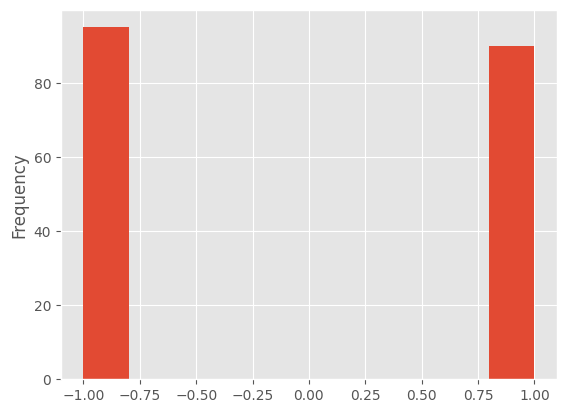

In [25]:
plt.style.use('ggplot')
daily_df['signal_daily'].plot(kind='hist')
plt.show()

In [26]:
daily_df

,Open,High,Low,Close,Adj Close,Volume,log_ret,variance,predictions,prediction_premium,premium_std,signal_daily
Date,,,,,,,,,,,,
2020-06-28,2262.115234,2299.386719,2243.881348,2285.895508,2285.895508,1.456087e+10,0.010797,0.002473,0.000728,-0.705556,NaN,NaN
2020-06-29,2285.007324,2309.393311,2260.468994,2297.713623,2297.713623,1.646055e+10,0.005157,0.002473,0.000651,-0.736678,NaN,NaN
2020-06-30,2296.395264,2304.458984,2271.209473,2284.498291,2284.498291,1.573580e+10,-0.005768,0.002468,0.000877,-0.644670,NaN,NaN
2020-07-01,2286.496338,2327.438721,2276.183838,2307.081299,2307.081299,1.597155e+10,0.009837,0.002455,0.000618,-0.748362,NaN,NaN
2020-07-02,2307.784912,2318.740723,2259.155762,2280.852539,2280.852539,1.633892e+10,-0.011434,0.002456,0.000703,-0.713818,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-14,6557.069336,6693.655762,6542.862793,6634.918457,6634.918457,1.381136e+10,0.011801,0.000393,0.000334,-0.151792,0.549073,NaN
2023-09-15,6633.454590,6710.124512,6560.175293,6652.173340,6652.173340,1.147974e+10,0.002597,0.000385,0.000292,-0.240810,0.546370,NaN
2023-09-16,6651.549805,6688.692383,6618.472656,6642.070313,6642.070313,7.402031e+09,-0.001520,0.000384,0.000286,-0.256793,0.545350,NaN


In [27]:
final_df = intraday_df.reset_index().merge(daily_df[['signal_daily']].reset_index(),
                                           left_on='date',
                                           right_on='Date').drop(
                                               ['date', 'Date']
                                           , axis=1).set_index('datetime')
final_df

,open,low,high,close,volume,signal_daily
datetime,,,,,,
2021-09-29 20:00:00,10379.7775,10364.5950,10398.7025,10370.9575,46,NaN
2021-09-29 20:05:00,10370.9425,10352.4175,10380.2500,10371.1450,53,NaN
2021-09-29 20:10:00,10372.8150,10357.8250,10388.7500,10384.3125,116,NaN
2021-09-29 20:15:00,10385.8275,10384.0825,10457.2000,10442.5175,266,NaN
2021-09-29 20:20:00,10442.5225,10426.2375,10448.0000,10440.9950,65,NaN
...,...,...,...,...,...,...
2023-09-18 23:35:00,6708.0025,6705.5175,6712.0000,6708.8675,11,NaN
2023-09-18 23:40:00,6708.8650,6707.1800,6714.2500,6709.3350,22,NaN
2023-09-18 23:45:00,6709.9250,6704.3600,6713.5000,6708.2750,25,NaN


In [28]:
final_df['rsi'] = ta.rsi(close=final_df['close'], length=20)
final_df['lband'] = ta.bbands(close=final_df['close'], length=20).iloc[:,0]
final_df['uband'] = ta.bbands(close=final_df['close'], length=20).iloc[:,2]
final_df['signal_intraday'] = final_df.apply(lambda x: 1 if (x['rsi']>70)&(x['close']>x['uband']) else (-1 if (x['rsi']<30)&(x['close']<x['lband']) else np.nan),
                                             axis=1)
final_df['returns'] = np.log(final_df['close']).diff()
final_df

,open,low,high,close,volume,signal_daily,rsi,lband,uband,signal_intraday,returns
datetime,,,,,,,,,,,
2021-09-29 20:00:00,10379.7775,10364.5950,10398.7025,10370.9575,46,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-29 20:05:00,10370.9425,10352.4175,10380.2500,10371.1450,53,NaN,NaN,NaN,NaN,NaN,0.000018
2021-09-29 20:10:00,10372.8150,10357.8250,10388.7500,10384.3125,116,NaN,NaN,NaN,NaN,NaN,0.001269
2021-09-29 20:15:00,10385.8275,10384.0825,10457.2000,10442.5175,266,NaN,NaN,NaN,NaN,NaN,0.005589
2021-09-29 20:20:00,10442.5225,10426.2375,10448.0000,10440.9950,65,NaN,NaN,NaN,NaN,NaN,-0.000146
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-18 23:35:00,6708.0025,6705.5175,6712.0000,6708.8675,11,NaN,62.861699,6677.365065,6715.855435,NaN,0.000128
2023-09-18 23:40:00,6708.8650,6707.1800,6714.2500,6709.3350,22,NaN,63.165869,6679.544207,6716.559793,NaN,0.000070
2023-09-18 23:45:00,6709.9250,6704.3600,6713.5000,6708.2750,25,NaN,61.954798,6682.379916,6716.534084,NaN,-0.000158


In [31]:
final_df['return_sign'] = final_df.apply(lambda x: -1 if (x['signal_daily']==1)&(x['signal_intraday']==1) else (1 if (x['signal_daily']==-1)&(x['signal_intraday']==-1) else np.nan), axis=1)
final_df['return_sign'] = final_df.groupby(pd.Grouper(freq='D'))['return_sign'].transform(lambda x: x.ffill())
final_df['forward_return'] = final_df['returns'].shift(-1)
final_df['strategy_return'] = final_df['forward_return']*final_df['return_sign']
daily_return_df = final_df.groupby(pd.Grouper(freq='D'))['strategy_return'].sum()
daily_return_df

datetime
2021-09-29    0.0
2021-09-30    0.0
2021-10-01    0.0
2021-10-02    0.0
2021-10-03    0.0
             ... 
2023-09-14    0.0
2023-09-15    0.0
2023-09-16    0.0
2023-09-17    0.0
2023-09-18    0.0
Freq: D, Name: strategy_return, Length: 720, dtype: float64

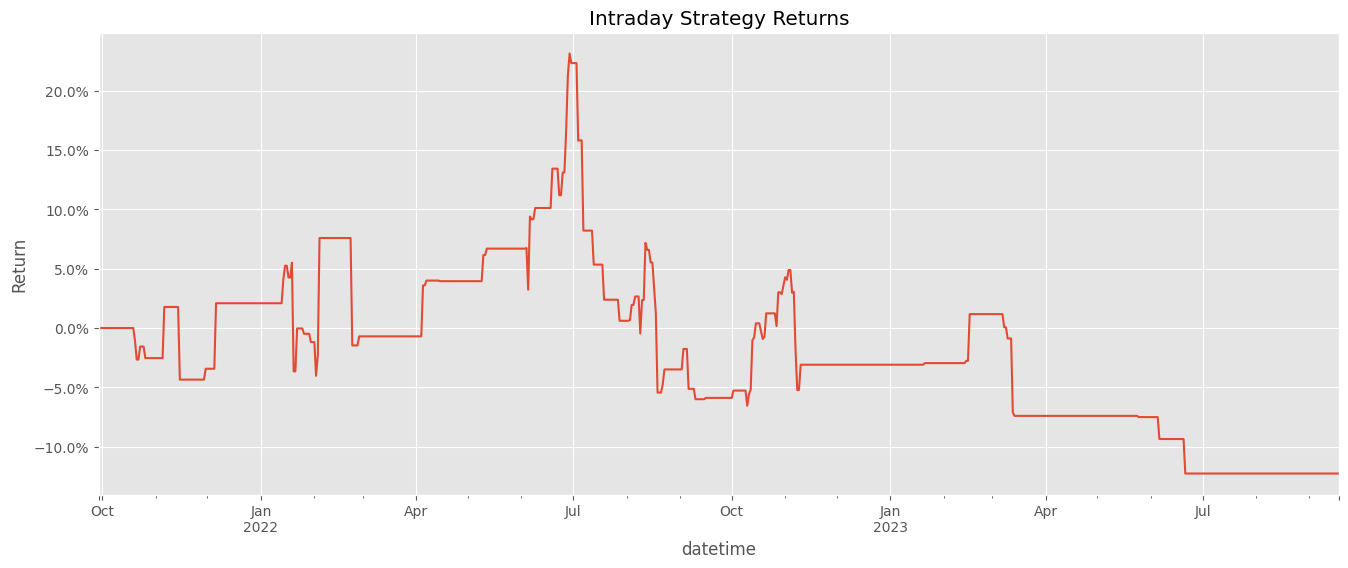

In [32]:
import matplotlib.ticker as mtick

strategy_cumulative_return = np.exp(np.log1p(daily_return_df).cumsum()).sub(1)

strategy_cumulative_return.plot(figsize=(16,6))

plt.title('Intraday Strategy Returns')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()
                                                                            